In [1]:
#IMPORTING ALL NECESSARY LIBRARIES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy.testing as testing
%matplotlib inline 


In [65]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = (10,7)
plt.rcParams['figure.facecolor'] = '#FFE5B4'


**DATA CLEANING**

In [3]:
#importing our dataset for the project
data = pd.read_csv('whr2023.csv')
data.head()

,Country name,iso alpha,Regional indicator,Happiness score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,...,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Afghanistan,AFG,South Asia,1.859,0.033,1.923,1.795,7.324,0.341,54.712,...,-0.081,0.847,1.778,0.645,0.000,0.087,0.000,0.093,0.059,0.976
1,Albania,ALB,Central and Eastern Europe,5.277,0.066,5.406,5.148,9.567,0.718,69.150,...,-0.007,0.878,1.778,1.449,0.951,0.480,0.549,0.133,0.037,1.678
2,Algeria,DZA,Middle East and North Africa,5.329,0.062,5.451,5.207,9.300,0.855,66.549,...,-0.117,0.717,1.778,1.353,1.298,0.409,0.252,0.073,0.152,1.791
3,Argentina,ARG,Latin America and Caribbean,6.024,0.063,6.147,5.900,9.959,0.891,67.200,...,-0.089,0.814,1.778,1.590,1.388,0.427,0.587,0.088,0.082,1.861
4,Armenia,ARM,Commonwealth of Independent States,5.342,0.066,5.470,5.213,9.615,0.790,67.789,...,-0.155,0.705,1.778,1.466,1.134,0.443,0.551,0.053,0.160,1.534


In [4]:
data.columns

Index(['Country name', 'iso alpha', 'Regional indicator', 'Happiness score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

In [5]:
#Taking only those columns which are necessary
data_columns = ['Country name' ,'Regional indicator' ,'Happiness score','Logged GDP per capita',
                'Social support' ,'Healthy life expectancy','Freedom to make life choices', 'Generosity',
                'Perceptions of corruption' ]

In [6]:
happy_df =data[data_columns].copy()

In [7]:
#This is the desired dataframe with desired columns
happy_df

,Country name,Regional indicator,Happiness score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Afghanistan,South Asia,1.859,7.324,0.341,54.712,0.382,-0.081,0.847
1,Albania,Central and Eastern Europe,5.277,9.567,0.718,69.150,0.794,-0.007,0.878
2,Algeria,Middle East and North Africa,5.329,9.300,0.855,66.549,0.571,-0.117,0.717
3,Argentina,Latin America and Caribbean,6.024,9.959,0.891,67.200,0.823,-0.089,0.814
4,Armenia,Commonwealth of Independent States,5.342,9.615,0.790,67.789,0.796,-0.155,0.705
...,...,...,...,...,...,...,...,...,...
132,Uzbekistan,Commonwealth of Independent States,6.014,8.948,0.875,65.301,0.938,0.230,0.638
133,Venezuela,Latin America and Caribbean,5.211,5.527,0.839,64.050,0.659,0.128,0.811
134,Vietnam,Southeast Asia,5.763,9.287,0.821,65.502,0.939,-0.004,0.759
135,Zambia,Sub-Saharan Africa,3.982,8.074,0.694,55.032,0.791,0.098,0.818


In [8]:
happy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  137 non-null    object 
 1   Regional indicator            137 non-null    object 
 2   Happiness score               137 non-null    float64
 3   Logged GDP per capita         137 non-null    float64
 4   Social support                137 non-null    float64
 5   Healthy life expectancy       136 non-null    float64
 6   Freedom to make life choices  137 non-null    float64
 7   Generosity                    137 non-null    float64
 8   Perceptions of corruption     137 non-null    float64
dtypes: float64(7), object(2)
memory usage: 9.8+ KB


In [9]:
happy_df['Regional indicator'].nunique()

10

In [10]:
#As seen above the column 'Regional indicator' only have 10 unique values in it , we will change it 
# datatype to category

happy_df['Regional indicator'] = happy_df['Regional indicator'].astype('category')

In [11]:
happy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Country name                  137 non-null    object  
 1   Regional indicator            137 non-null    category
 2   Happiness score               137 non-null    float64 
 3   Logged GDP per capita         137 non-null    float64 
 4   Social support                137 non-null    float64 
 5   Healthy life expectancy       136 non-null    float64 
 6   Freedom to make life choices  137 non-null    float64 
 7   Generosity                    137 non-null    float64 
 8   Perceptions of corruption     137 non-null    float64 
dtypes: category(1), float64(7), object(1)
memory usage: 9.2+ KB


In [12]:
#We will check for null values
happy_df.isnull().sum()

Country name                    0
Regional indicator              0
Happiness score                 0
Logged GDP per capita           0
Social support                  0
Healthy life expectancy         1
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [13]:
# Only one column have one null values , lets check it
happy_df[happy_df['Healthy life expectancy'].isnull()]

,Country name,Regional indicator,Happiness score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
116,State of Palestine,Middle East and North Africa,4.908,8.716,0.859,NaN,0.694,-0.132,0.836


In [14]:
#We can see that all other columns except'Healthy life expectancy' have proper values , so we will
# replace the Nan value with most common value
from statistics import mode
happy_df['Healthy life expectancy'].fillna(value=mode(happy_df['Healthy life expectancy']), inplace=True)

In [15]:
happy_df.iloc[116] 
#We can see that the Nan value has been replaced.

Country name                              State of Palestine
Regional indicator              Middle East and North Africa
Happiness score                                        4.908
Logged GDP per capita                                  8.716
Social support                                         0.859
Healthy life expectancy                                71.15
Freedom to make life choices                           0.694
Generosity                                            -0.132
Perceptions of corruption                              0.836
Name: 116, dtype: object

In [16]:
happy_df.isnull().sum()
#There are no null values 

Country name                    0
Regional indicator              0
Happiness score                 0
Logged GDP per capita           0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

**DATA VISUALIZATION**

<Axes: title={'center': 'Top 10 happiest Countries'}, xlabel='Country name', ylabel='Happiness score'>

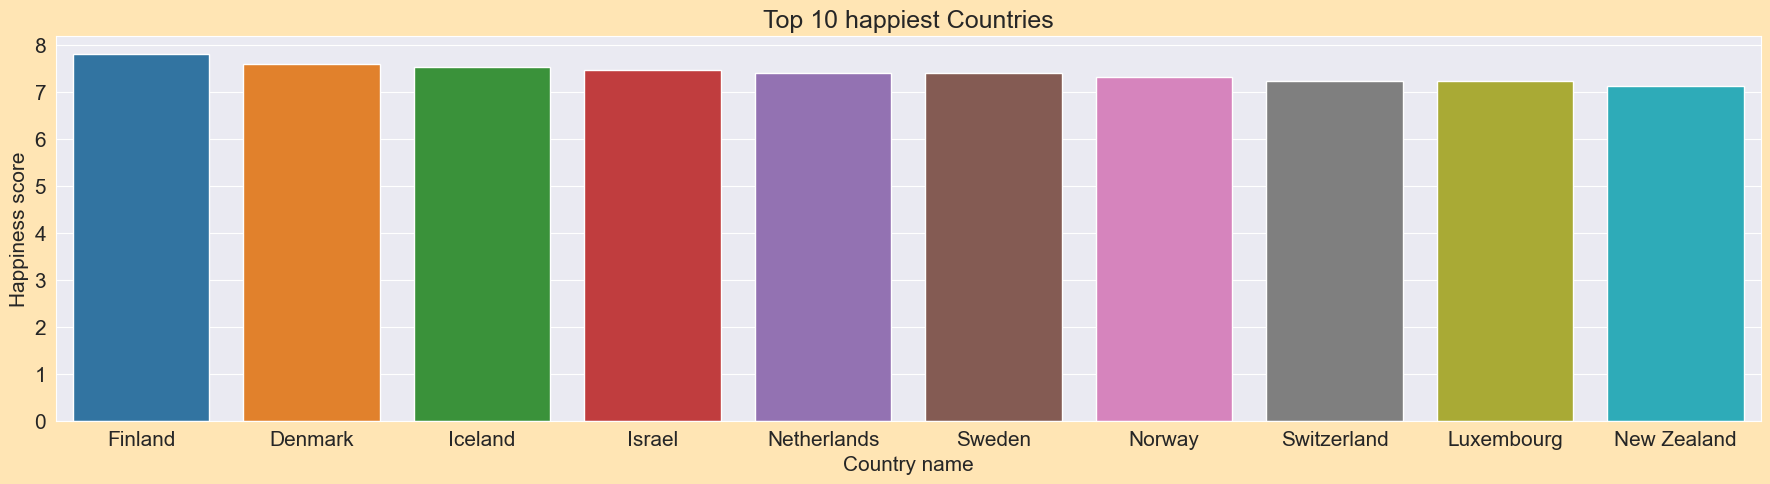

In [66]:
#Top 10 happiest countries 
happy_countries_df=happy_df.nlargest(n=10,columns='Happiness score')
plt.figure(figsize=(22,5))
plt.title('Top 10 happiest Countries')
sns.barplot(data=happy_countries_df,y='Happiness score',x='Country name',estimator='max')

**Above are the top 10 happiest countries of 2023**

<Axes: title={'center': 'bottom 10 happiest Countries'}, xlabel='Country name', ylabel='Happiness score'>

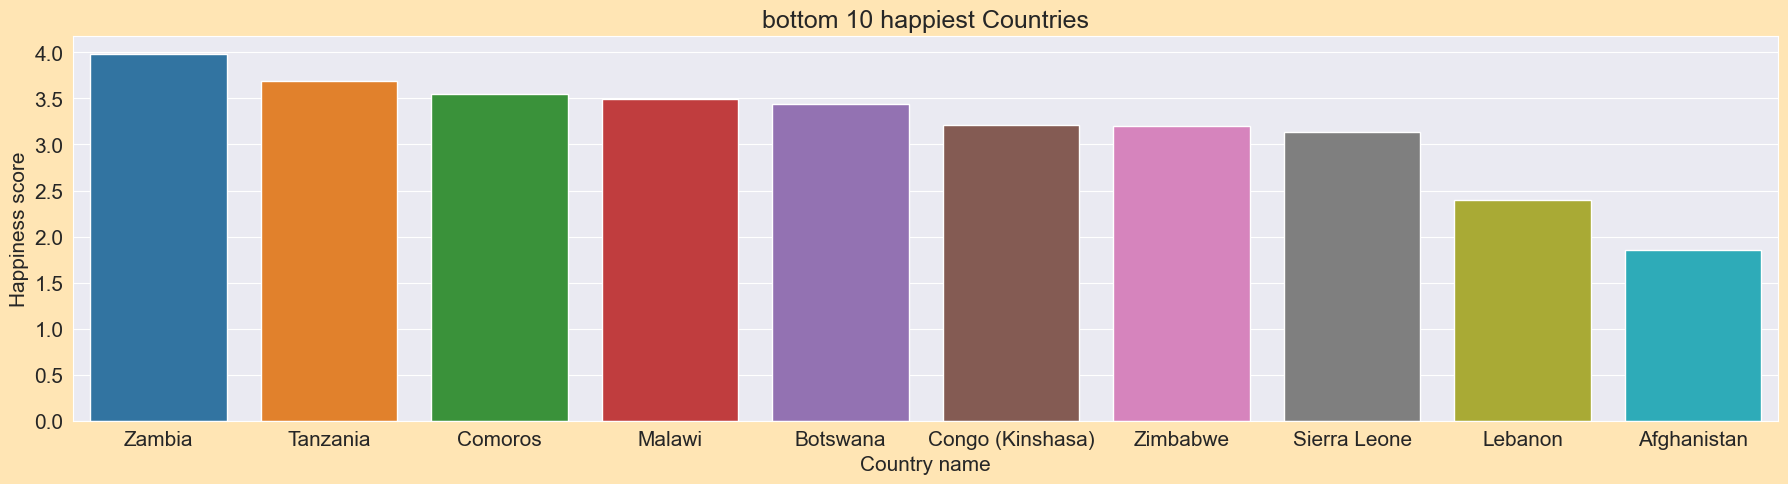

In [67]:
#Bottom 10 happiest countries 
bottom_countries_df=happy_df.nsmallest(n=10,columns='Happiness score').sort_values(by='Happiness score',ascending=False)
plt.figure(figsize=(22,5))
plt.title('bottom 10 happiest Countries')
sns.barplot(data=bottom_countries_df,y='Happiness score',x='Country name',estimator='max')

**Above are the bottom 10 happiest countries of 2023**

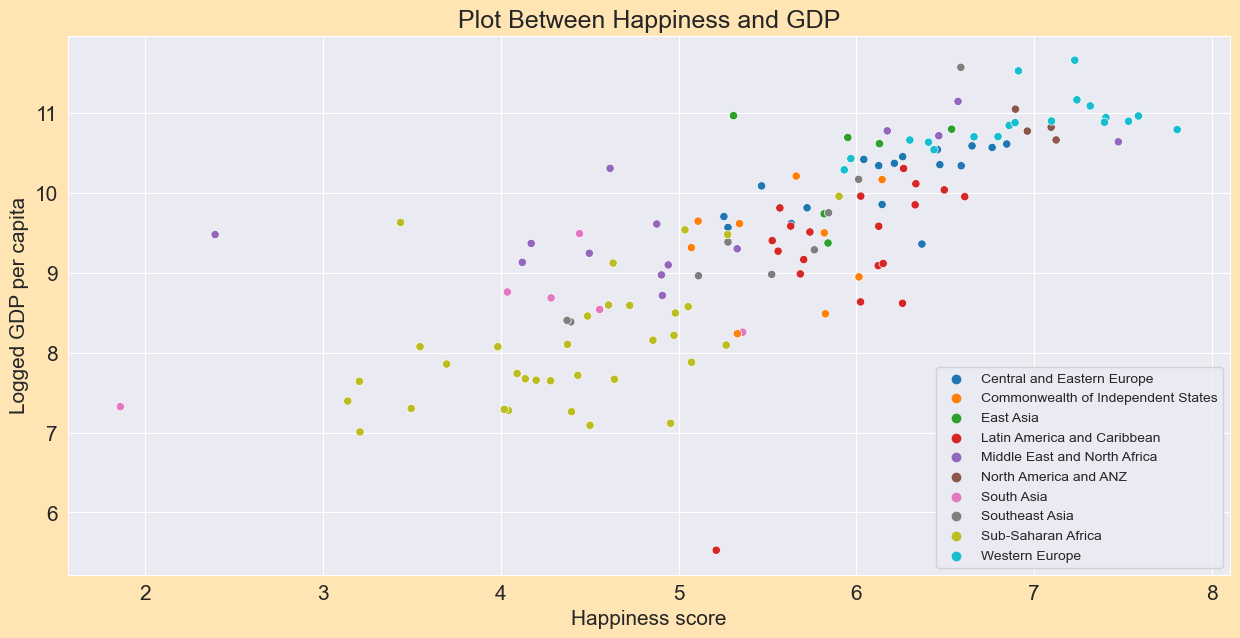

In [68]:
#Plot between Happiness and GDP

plt.figure(figsize=(15,7))
plt.title('Plot Between Happiness and GDP')
sns.scatterplot(data=happy_df,x='Happiness score',y='Logged GDP per capita', hue='Regional indicator')
plt.legend(loc='lower right', fontsize='10')

**From the above scatterplot we can see countries in Western Europe have hight GDP and also High
happiness score followed by North America and ANZ region . Most countries of Sub-Sahara Africa have
low GDP and also Low Happiness Score . South Asia can be considered as outlier because both Happiness score and GDP of South Asia country is less than others**

In [69]:
#pie plot to see which GDP distribution among regions
gdp_regions=happy_df.groupby('Regional indicator')['Logged GDP per capita'].sum()


Text(0, 0.5, '')

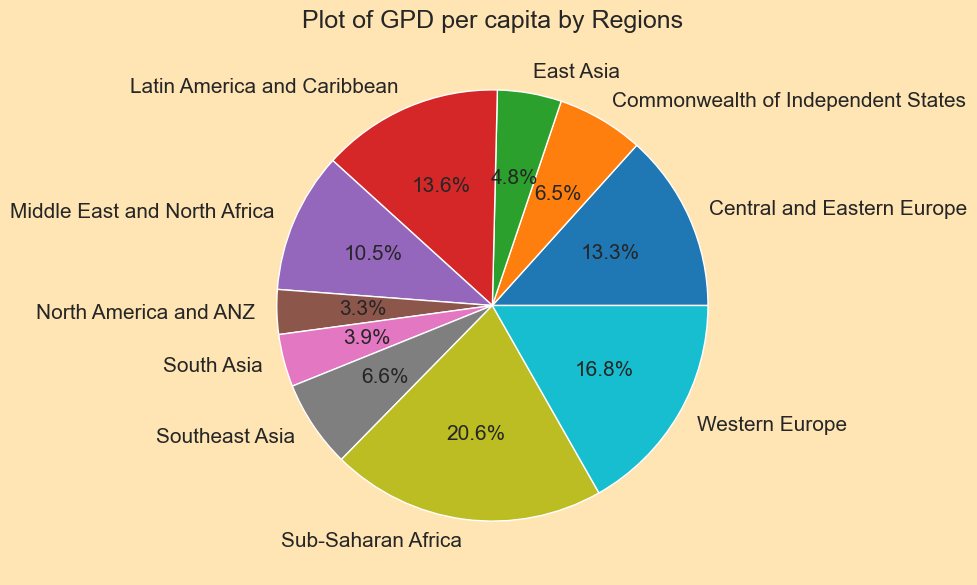

In [19]:
gdp_regions.plot.pie(autopct = '%1.1f%%')
plt.title('Plot of GPD per capita by Regions')
plt.ylabel('')

**From the above graph we can see that Sub-Sahara Africa have high GDP because number of countries in 
that region is more compare to others**

In [70]:
#Total Countries in Each Regions
total_countries=happy_df.groupby('Regional indicator')['Country name'].count()
total_countries

Regional indicator
Central and Eastern Europe            17
Commonwealth of Independent States     9
East Asia                              6
Latin America and Caribbean           19
Middle East and North Africa          14
North America and ANZ                  4
South Asia                             6
Southeast Asia                         9
Sub-Saharan Africa                    33
Western Europe                        20
Name: Country name, dtype: int64

<Axes: >

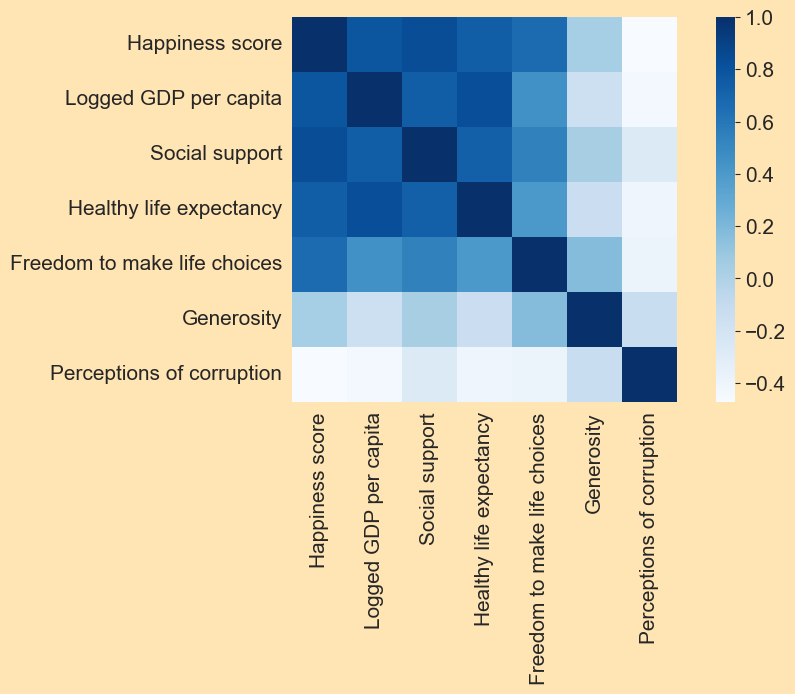

In [21]:
#Correlation Map
cor=happy_df.corr(method='pearson',numeric_only=True)
f,ax=plt.subplots(figsize = (10,5))
sns.heatmap(data=cor , cmap='Blues',square=True)

In [71]:
#Corruption in regions
corruption = happy_df.groupby('Regional indicator')['Perceptions of corruption'].mean()
corruption_df=pd.DataFrame(corruption)
corruption_df.rename(mapper={'Perceptions of corruption':'perception_of_corruption'},axis='columns',inplace=True)
corruption_df

,perception_of_corruption
Regional indicator,
Central and Eastern Europe,0.831529
Commonwealth of Independent States,0.749778
East Asia,0.663833
Latin America and Caribbean,0.783158
Middle East and North Africa,0.754786
North America and ANZ,0.469000
South Asia,0.782833
Southeast Asia,0.711000
Sub-Saharan Africa,0.785727


<BarContainer object of 10 artists>

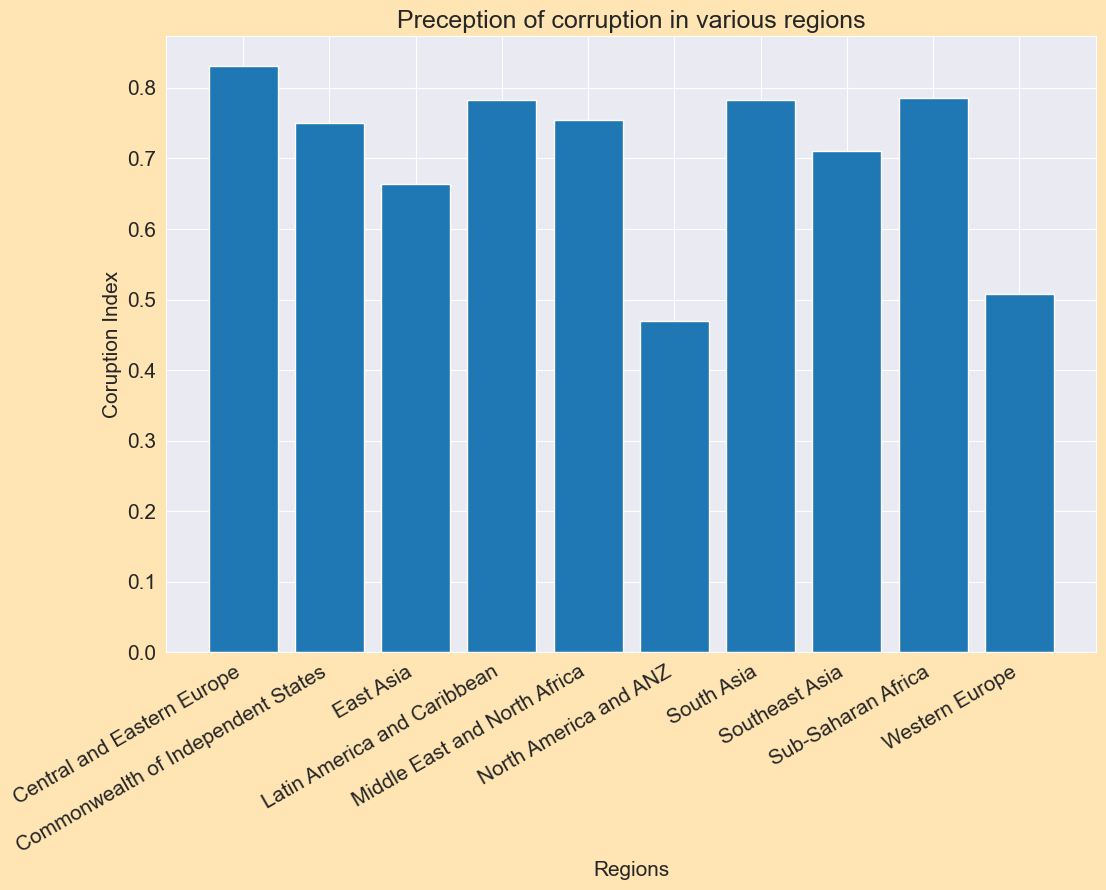

In [23]:
plt.figure(figsize=(12,8))
plt.title('Preception of corruption in various regions')
plt.xlabel('Regions',fontsize=15)
plt.ylabel('Coruption Index',fontsize=15)
plt.xticks(rotation=30,ha='right')
plt.bar(corruption_df.index,corruption_df.perception_of_corruption)

**Highest corruption as per the citizen survey is in Central and Eastern Europe  and least is in North America and Anz**

In [44]:
happy_df.columns

Index(['Country name', 'Regional indicator', 'Happiness score',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [24]:
#Ploting top 10 happiest countries  life expectancy and bottom 10  countries  life expectancy

In [43]:
top_10=happy_df.nlargest(n=10,columns='Happiness score')
bottom_10=happy_df.nsmallest(n=10,columns='Happiness score')

Text(832.0858585858584, 0.5, 'Life expentency')

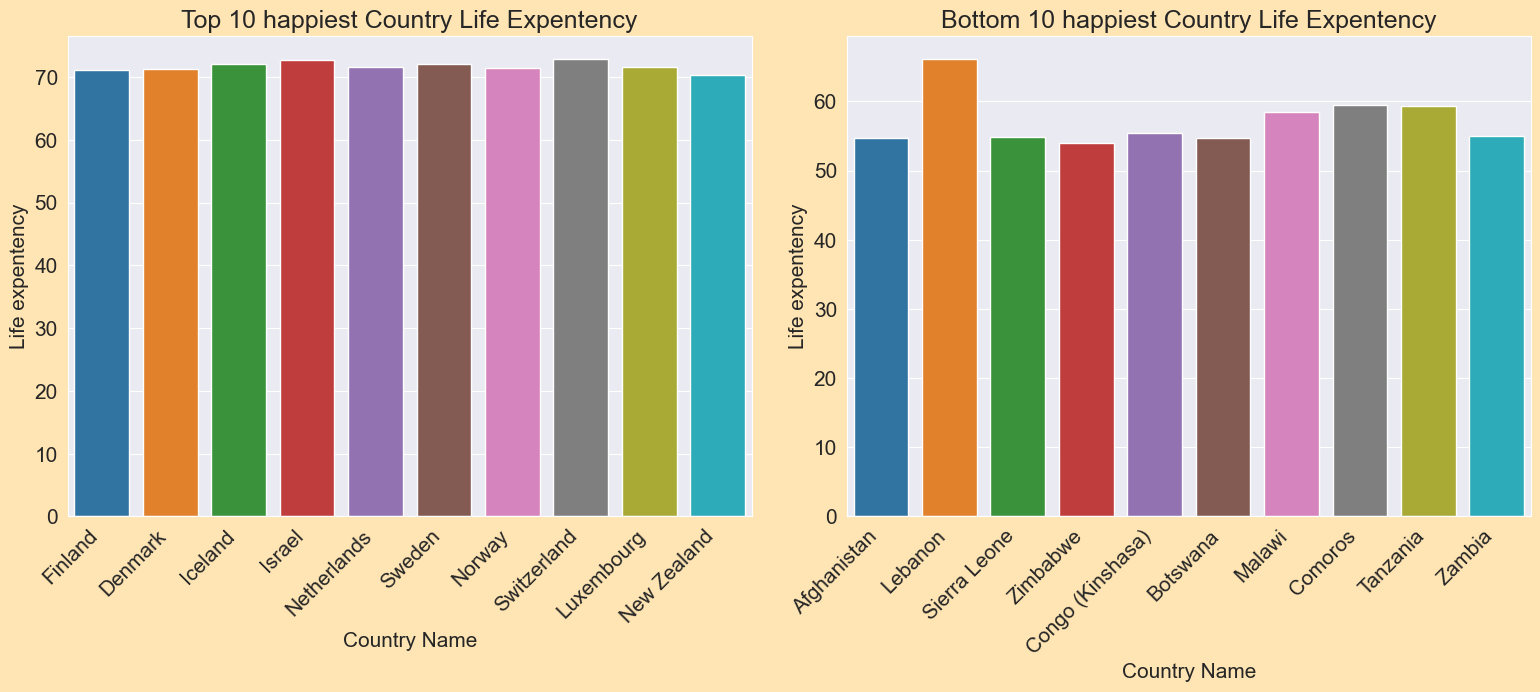

In [72]:

country_name=top_10['Country name']
fig,axes=plt.subplots(1,2,figsize=(16,6))

plt.tight_layout(pad=2)

axes[0].set_title('Top 10 happiest Country Life Expentency')
axes[0].set_xticklabels(country_name,rotation=45,ha='right')
sns.barplot(data=top_10,x='Country name',y='Healthy life expectancy',ax=axes[0])
axes[0].set_xlabel('Country Name')
axes[0].set_ylabel('Life expentency')


axes[1].set_title('Bottom 10 happiest Country Life Expentency')
axes[1].set_xticklabels(country_name ,rotation=45,ha='right')
sns.barplot(data=bottom_10,x='Country name',y='Healthy life expectancy',ax=axes[1])
axes[1].set_xlabel('Country Name')
axes[1].set_ylabel('Life expentency')


**From above comparisoin we can see how life expentency gets affected in Top 10 and Bottom 10 Happiest
country**

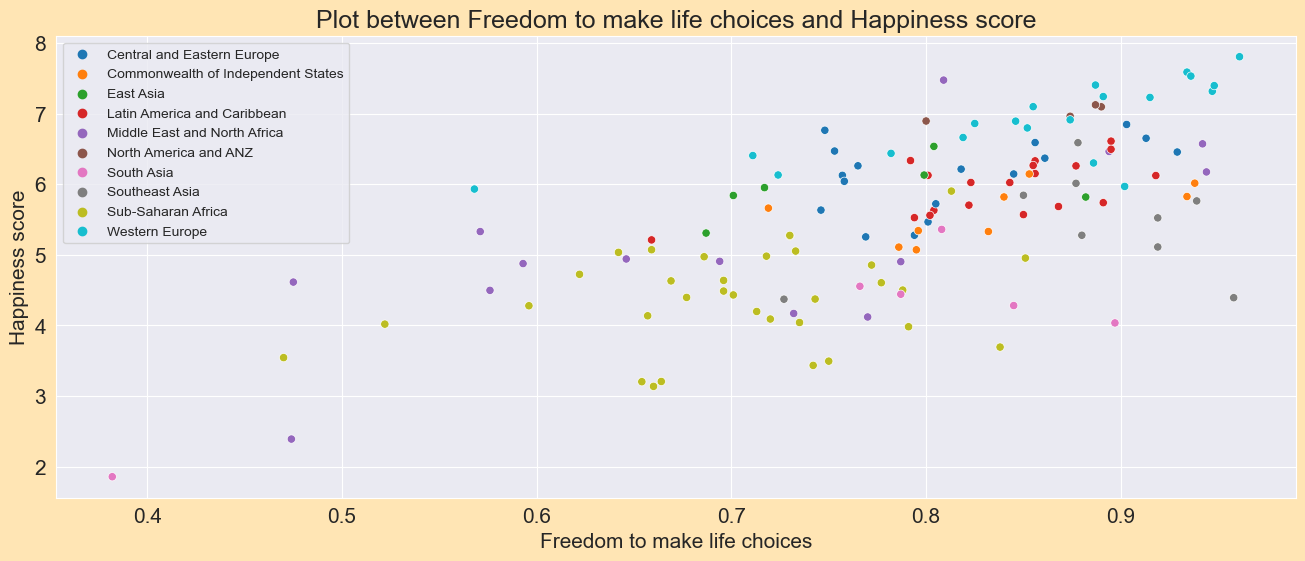

In [78]:
#scatterplot between Freedom to make life choices and Happiness score
plt.figure(figsize=(16,6))
plt.title('Plot between Freedom to make life choices and Happiness score')
sns.scatterplot(data=happy_df,x='Freedom to make life choices',y='Happiness score',hue='Regional indicator')
plt.legend(fontsize=10)

In [79]:
happy_df.columns

Index(['Country name', 'Regional indicator', 'Happiness score',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

Text(0.5, 1.0, 'Highest Corruption in Different Countries')

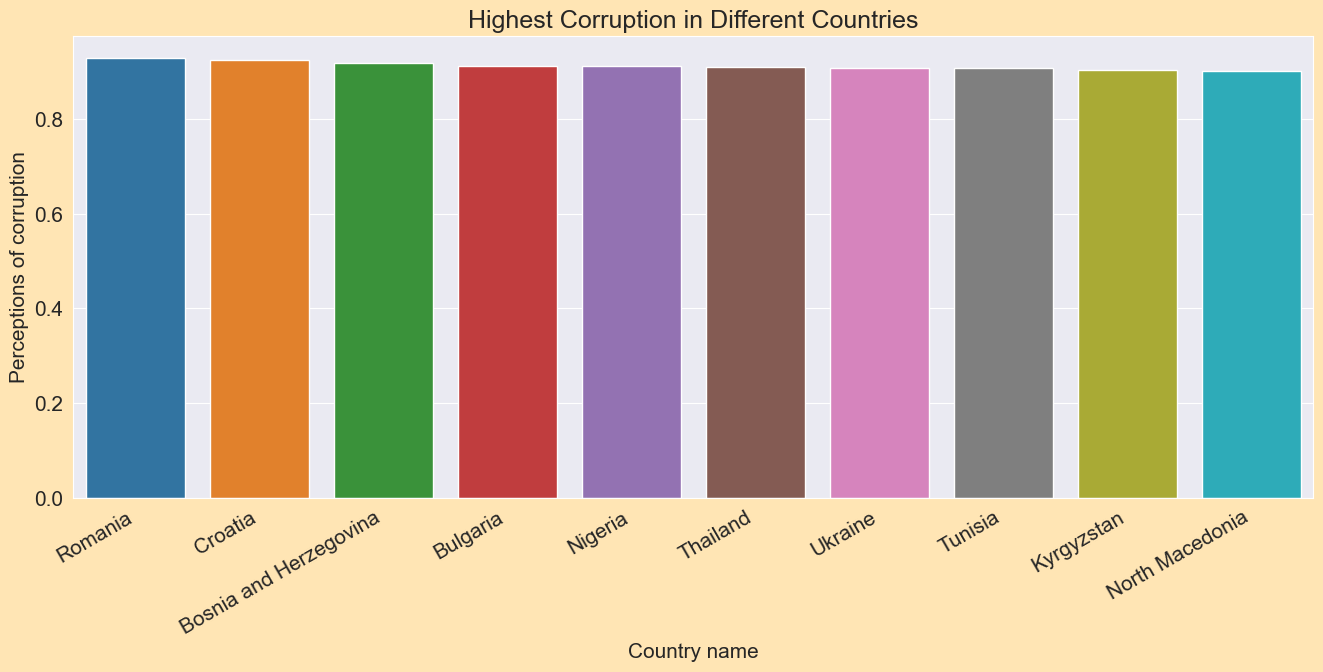

In [89]:
#Corruption level in different countries
country_corruption= happy_df.sort_values(by='Perceptions of corruption',ascending=False).head(10)
plt.figure(figsize=(16,6))
plt.xticks(rotation=30,ha='right')
sns.barplot(data=country_corruption,x='Country name',y='Perceptions of corruption')
plt.title('Highest Corruption in Different Countries')


Text(0.5, 1.0, 'lowest Corruption in Different Countries')

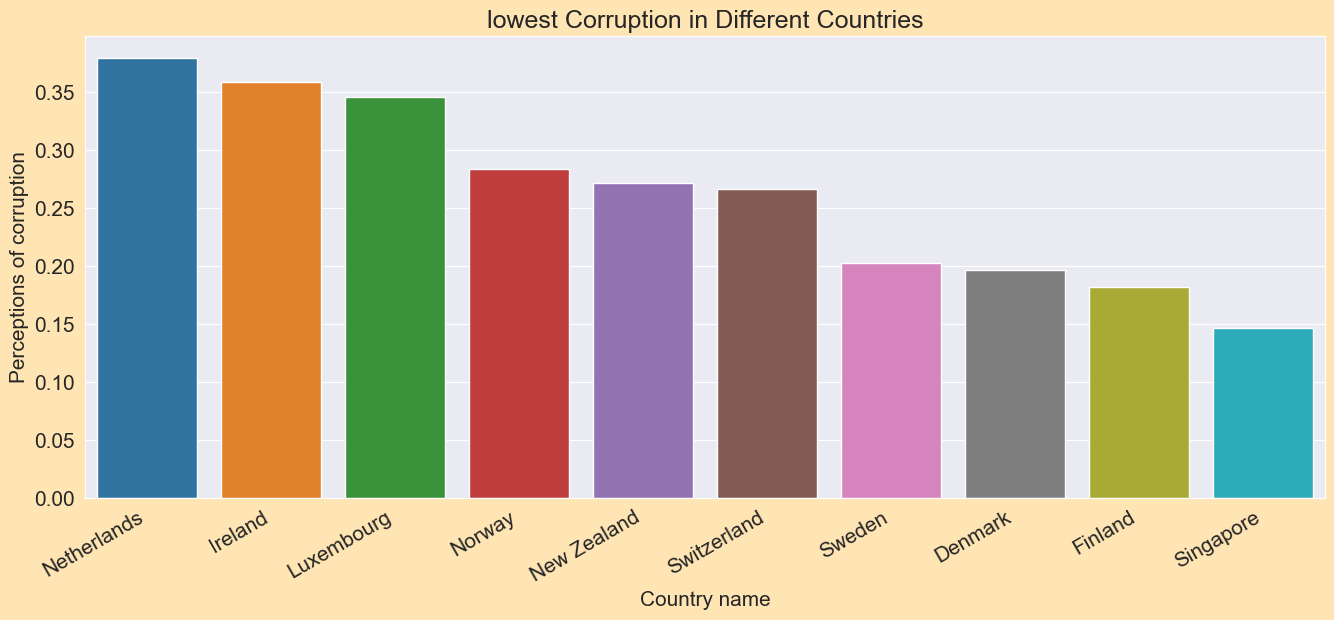

In [91]:
#Corruption in different countries
country_corruption= happy_df.sort_values(by='Perceptions of corruption',ascending=False).tail(10)
plt.figure(figsize=(16,6))
plt.xticks(rotation=30,ha='right')
sns.barplot(data=country_corruption,x='Country name',y='Perceptions of corruption')
plt.title('lowest Corruption in Different Countries')


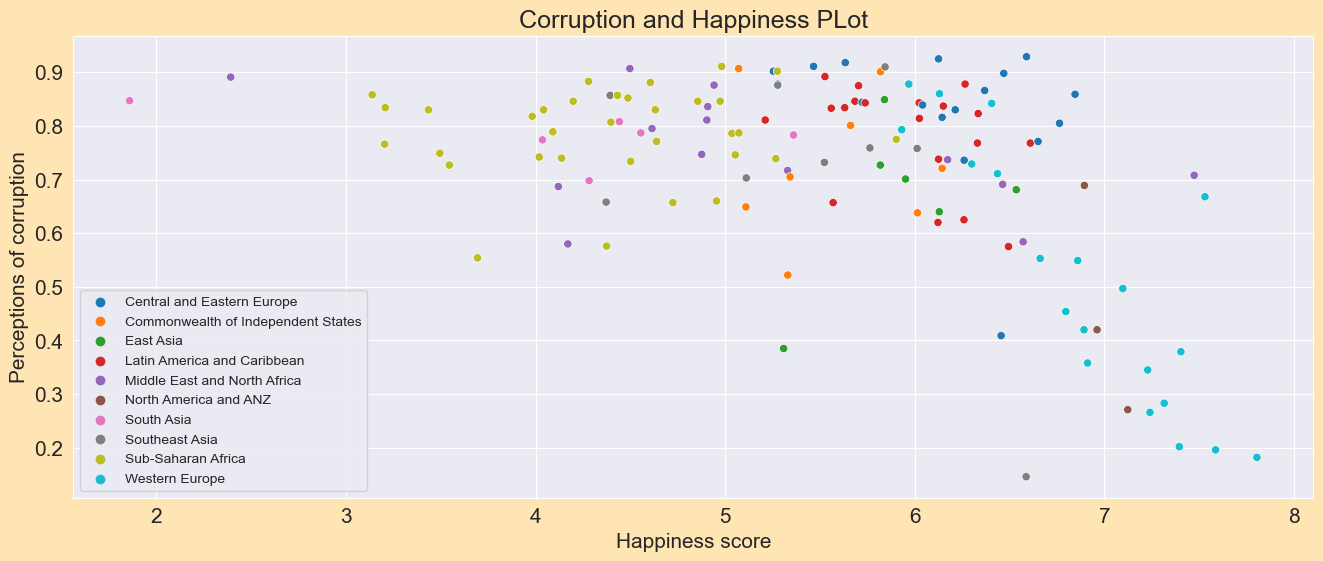

In [95]:
#Corruption vs Happiness
plt.figure(figsize=(16,6))
sns.scatterplot(data=happy_df,x='Happiness score',y='Perceptions of corruption',hue='Regional indicator')
plt.title('Corruption and Happiness PLot')
plt.legend(loc='lower left',fontsize=10)

**Countries with more happiest score have lowest Preception of Corruption**